In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn import metrics
from sklearn.model_selection import KFold,cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv(r"C:\rock\data.csv" ,delimiter=';')

In [7]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [8]:
df.shape

(4424, 37)

In [9]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [11]:
df.duplicated().sum()       

0

In [12]:
## NO DUPLICATES 

## Missing value

In [13]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [14]:
## NO MISSING VALUE 

## DATA TYPE CASTING 

In [15]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [16]:
df.columns=df.columns.str.lower()
df.head()

,marital status,application mode,application order,course,daytime/evening attendance\t,previous qualification,previous qualification (grade),nacionality,mother's qualification,father's qualification,...,curricular units 2nd sem (credited),curricular units 2nd sem (enrolled),curricular units 2nd sem (evaluations),curricular units 2nd sem (approved),curricular units 2nd sem (grade),curricular units 2nd sem (without evaluations),unemployment rate,inflation rate,gdp,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [17]:
df.columns = ['Marital_status', 'Application_mode', 'Application_order', 'Course', 'attendance', 'Prev_qualific', 'Prev_qualific_grade', 'Nationality', 'Mother_qualific',
              'father_qualific','mother_occupation','father_occupation','admission_grade','displaced','education_spec_needs','debtor','tuition_fees',
              'gender','scholar_holder','age_at_enroll','international','1st_sem_credited','1st_sem_enrolled','1st_sem_evalua','1st_sem_approved',
              '1st_sem_grade','1st_sem_without_evalu','2nd_sem_credited','2nd_sem_enrolled','2nd_sem_evalua','2nd_sem_approved','2nd_sem_grade',
              '2nd_sem_without_evalu','unemployment rate','inflation rate','gdp','target']

In [18]:
df.columns = df.columns.str.lower()
df.head()

,marital_status,application_mode,application_order,course,attendance,prev_qualific,prev_qualific_grade,nationality,mother_qualific,father_qualific,...,2nd_sem_credited,2nd_sem_enrolled,2nd_sem_evalua,2nd_sem_approved,2nd_sem_grade,2nd_sem_without_evalu,unemployment rate,inflation rate,gdp,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [19]:
df.describe()

,marital_status,application_mode,application_order,course,attendance,prev_qualific,prev_qualific_grade,nationality,mother_qualific,father_qualific,...,1st_sem_without_evalu,2nd_sem_credited,2nd_sem_enrolled,2nd_sem_evalua,2nd_sem_approved,2nd_sem_grade,2nd_sem_without_evalu,unemployment rate,inflation rate,gdp
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [20]:
df_types = {'marital_status':np.int8,'application_mode':np.int8,'application_order' : np.int8,'attendance' : np.int8,'prev_qualific':np.int8,
            'prev_qualific_grade':np.float16,'nationality':np.int8,'mother_qualific':np.int8,'father_qualific':np.int8,'mother_occupation':np.int16,'father_occupation':np.int16,
            'admission_grade':np.float16,'displaced':np.int16,'education_spec_needs':np.int8,'debtor':np.int8,'tuition_fees':np.int8,'gender':np.int8,'scholar_holder':np.int8,
            'age_at_enroll':np.int8,'international':np.int8,'1st_sem_credited':np.int8,'1st_sem_enrolled':np.int8,'1st_sem_evalua':np.int8,'1st_sem_approved':np.int8,
            '1st_sem_grade':np.float16,'1st_sem_without_evalu':np.int8,'2nd_sem_credited':np.int8,'2nd_sem_enrolled':np.int8,'2nd_sem_evalua':np.int8,'2nd_sem_approved':np.int8,
            '2nd_sem_grade':np.float16,'2nd_sem_without_evalu':np.int8,'unemployment rate':np.float16,'inflation rate':np.float16,'gdp':np.float16,'target':object}

In [21]:
df = df.astype(df_types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   marital_status         4424 non-null   int8   
 1   application_mode       4424 non-null   int8   
 2   application_order      4424 non-null   int8   
 3   course                 4424 non-null   int64  
 4   attendance             4424 non-null   int8   
 5   prev_qualific          4424 non-null   int8   
 6   prev_qualific_grade    4424 non-null   float16
 7   nationality            4424 non-null   int8   
 8   mother_qualific        4424 non-null   int8   
 9   father_qualific        4424 non-null   int8   
 10  mother_occupation      4424 non-null   int16  
 11  father_occupation      4424 non-null   int16  
 12  admission_grade        4424 non-null   float16
 13  displaced              4424 non-null   int16  
 14  education_spec_needs   4424 non-null   int8   
 15  debt

In [22]:
df['marital_status'] = df['marital_status'].replace({1: 'single', 2: 'married',3: 'widower',4: 'divorced',5: 'facto union',6:'legally separated'})
df['application_mode'] = df['application_mode'].replace({1:'1st phase-general contingent',2:'Ordinance No. 612/93',7 :'Holders of other higher courses',
                                                         10:'International student (bachelor)',16:'1st phase-special contingent (Madeira Island)',17:'2nd phase-general contingent', 
                                                         18:'3rd phase - general contingent', 26:'Ordinance No. 533-A/99 item b2(Different Plan)',27:'Ordinance No. 533-A/99 item b3(Other Institution)',
                                                         39:'Over 23 years old', 42:'Transfer', 43:'Change of course', 44:'Technological specialization diploma holders', 51:'Change of institution/course',
                                                         53:'Short cycle diploma holders', 57:'Change of institution/course (International)',15:'International student (bachelor)',
                                                         5:'1st phase - special contingent (Azores Island)'})
df['course'] = df['course'].replace({33:'Biofuel Production Technologies',8014:'Social Service',171:'Animation and Multimedia Design 8014 Social Service (evening attendance)', 
                                     9003:'Agronomy', 9070:'Communication Design', 9085:'Veterinary Nursing', 9119:'Informatics Engineering', 9130:'Equinculture',
                                     9147:'Management', 9238:'Social Service', 9254:'Tourism', 9500:'Nursing', 9556:'Oral Hygiene',9670:'Advertising and Marketing Management', 9773:'Journalism and Communication', 9853:'Basic Education', 9991:'Management (evening attendance)'})
df['attendance'] = df['attendance'].replace({1:'daytime', 0:'evening'})
df['prev_qualific'] = df['prev_qualific'].replace({1:'Secondary education', 2:'Higher education-bachelors degree', 3:'Higher education-degree',
                                                   4:'Higher education-masters', 5:'Higher education-doctorate',6:'Frequency of higher education',
                                                   9:'12th year of schooling -not completed', 10:'11th year of schooling - not completed', 
                                                   12:'Other - 11th year of schooling', 14:'10th year of schooling', 15:'10th year of schooling - not completed', 
                                                   19:'Basic education 3rd cycle (9th/10th/11th year)', 38:'Basic education 2nd cycle (6th/7th/8th year)',
                                                   39:'Technological specialization course', 40:'Higher education - degree (1st cycle)', 42:'Professional higher technical course',
                                                   43:'Higher education - master (2nd cycle)'})
df['nationality'] = df['nationality'].replace({1:'Portuguese',2:'German',6:'Spanish',11:'Italian',13:'Dutch',14:'English',17:'Lithuanian',
                                               21:'Angolan',22:'Cape Verdean',24:'Guinean',25:'Mozambican',26:'Santomean',32:'Turkish',41:'Brazilian',
                                               62:'Romanian',100:'Moldova (Republic of)',101:'Mexican', 103:'Ukrainian',105:'Russian',108:'Cuban',
                                               109:'Colombian'})
df['scholar_holder'] =df['scholar_holder'].replace({1:'yes', 0:'no'})
df['tuition_fees'] =df['tuition_fees'].replace({1:'yes', 0:'no'})
df['debtor'] =df['debtor'].replace({1:'yes', 0:'no'})
df['education_spec_needs'] =df['education_spec_needs'].replace({1:'yes', 0:'no'})
df['mother_qualific'] =df['mother_qualific'].replace({1:'Secondary Education-12th Year of Schooling', 2:'Higher Education - Bachelor Degree',
                                                      3:'Higher Education-Degree', 4:'Higher Education-Master', 5:'Higher Education-Doctorate',
                                                      6:'Frequency of Higher Education', 9:'12th Year of Schooling - Not Completed', 10:'11th Year- Not Completed',
                                                      11:'7th Year(Old)', 12:'Other - 11th Year of Schooling', 14:'10th Year of Schooling', 18:'General commerce course', 
                                                      19:'Basic Education 3rd Cycle (9th/10th/11th Year)', 22:'Technical-professional course', 26:'7th year of schooling',
                                                      27:'2nd cycle of the general high school course', 29:'9th Year of Schooling - Not Completed', 
                                                      30:'8th year of schooling', 34:'Unknown', 35:'Cant read or write', 36:'Can read without having a 4th year of schooling', 
                                                      37:'Basic education 1st cycle (4th/5th year)', 38:'Basic Education 2nd Cycle (6th/7th/8th Year)',39:'Technological specialization course',
                                                      40:'Higher education - degree (1st cycle)', 41:'Specialized higher studies course', 42:'Professional higher technical course', 
                                                      43:'Higher Education - Master (2nd cycle)',44:'Higher Education - Doctorate (3rd cycle)'})
df['father_qualific'] =df['father_qualific'].replace({1:'Secondary Education - 12th Year of Schooling', 2:'Higher Education - Bachelor Degree',
                                                      3:'Higher Education - Degree', 4:'Higher Education - Master', 5:'Higher Education - Doctorate', 
                                                      6:'Frequency of Higher Education', 9:'12th Year of Schooling - Not Completed', 10:'11th Year of Schooling - Not Completed', 
                                                      11:'7th Year (Old)', 12:'Other - 11th Year of Schooling', 13:'2nd year complementary high school course', 14:'10th Year of Schooling',
                                                      18:'General commerce course', 19:'Basic Education 3rd Cycle (9th/10th/11th Year)',20:'Complementary High School Course',
                                                      22:'Technical-professional course', 25:'Complementary High School Course - not concluded', 26 :'7th year of schooling', 
                                                      27:'2nd cycle of the general high school course', 29:'9th Year of Schooling - Not Completed', 30:'8th year of schooling', 
                                                      31:'General Course of Administration and Commerce', 33:'Supplementary Accounting and Administration', 34:'Unknown',
                                                      35:'Cannot read or write', 36 :'Can read without having a 4th year of schooling', 37:'Basic education 1st cycle (4th/5th year)',
                                                      38:'Basic Education 2nd Cycle (6th/7th/8th Year)', 39:'Technological specialization course', 40:'Higher education - degree (1st cycle)', 
                                                      41:'Specialized higher studies course', 42:'Professional higher technical course', 43:'Higher Education - Master (2nd cycle)',
                                                      44:'Higher Education - Doctorate (3rd cycle)'})
df['mother_occupation'] =df['mother_occupation'].replace({0:'Student', 1:'Representatives of the Legislative Power and Executive Bodies,Directors, Directors and Executive Managers',
                                                          2:'Specialists in Intellectual and Scientific Activities', 3:'Intermediate Level Technicians and Professions', 
                                                          4:'Administrative staff', 5:'Personal Services Security and Safety Workers and Sellers',
                                                          6:'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry', 7:'Skilled Workers in Industry, Construction and Craftsmen',
                                                          8:'Installation and Machine Operators and Assembly Workers', 9:'Unskilled Workers', 10:'Armed Forces Professions',
                                                          90:'Other Situation', 99:'(blank)',122:'Health professionals',123:'teachers', 125:'Specialists in information and communication technologies (ICT)',
                                                          131:'Intermediate level science and engineering technicians and professions', 132:'Technicians and professionals, of intermediate level of health',
                                                          134:'Intermediate level technicians from legal, social, sports, cultural and similar services', 
                                                          141:'Office workers, secretaries in general and data processing operators', 143:'Data, accounting, statistical, financial services and registry-related operators', 
                                                          144:'Other administrative support staff', 151:'personal service workers', 152:'sellers', 153:'Personal care workers and the like', 
                                                          171:'Skilled construction workers and the like, except electricians', 173:'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
                                                          175:'Workers in food processing, woodworking, clothing and other industries and crafts', 191:'cleaning workers', 
                                                          192:'Unskilled workers in agriculture, animal production, fisheries and forestry', 193:'Unskilled workers in extractive industry, construction, manufacturing and transport',
                                                          194:'Meal preparation assistants'})
df['father_occupation'] =df['father_occupation'].replace({0:'Student', 1:'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
                                                          2:'Specialists in Intellectual and Scientific Activities', 3:'Intermediate Level Technicians and Professions', 
                                                          4:'Administrative staff', 5:'Personal Services, Security and Safety Workers and Sellers', 6:'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry', 
                                                          7:'Skilled Workers in Industry, Construction and Craftsmen', 8:'Installation and Machine Operators and Assembly Workers', 
                                                          9:'Unskilled Workers', 10:'Armed Forces Professions', 90:'Other Situation', 99:'(blank)',101:'Armed Forces Officers', 
                                                          102:'Armed Forces Sergeants', 103:'Other Armed Forces personnel', 112:'Directors of administrative and commercial services', 
                                                          114:'Hotel, catering, trade and other services directors', 121:'Specialists in the physical sciences, mathematics, engineering and related techniques', 122:'Health professionals', 
                                                          123:'teachers', 124:'Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions', 
                                                          132:'Technicians and professionals, of intermediate level of health', 134:'Intermediate level technicians from legal, social, sports, cultural and similar services', 
                                                          135:'Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators', 
                                                          143:'Data, accounting, statistical, financial services and registry-related operators', 144:'Other administrative support staff',
                                                          151:'personal service workers', 152:'sellers', 153:'Personal care workers and the like', 154:'Protection and security services personnel', 
                                                          161:'Market-oriented farmers and skilled agricultural and animal production workers',
                                                          163:'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence', 171:'Skilled construction workers and the like, except electricians', 
                                                          172:'Skilled workers in metallurgy, metalworking and similar', 174:'Skilled workers in electricity and electronics', 
                                                          175:'Workers in food processing, woodworking, clothing and other industries and crafts', 181:'Fixed plant and machine operators', 
                                                          182:'assembly workers', 183:'Vehicle drivers and mobile equipment operators', 192:'Unskilled workers in agriculture, animal production, fisheries and forestry',
                                                          193:'Unskilled workers in extractive industry, construction, manufacturing and transport', 194:'Meal preparation assistants', 
                                                          195:'Street vendors (except food) and street service providers'})
df['international'] =df['international'].replace({1:'yes', 0:'no'})
df['application_order'] = df['application_order'].replace({0:'first choice',1:'second choice',2:'third choice',3:'fourth choice',
                                                           4:'fifth choice',5:'sixth choice',6:'seventh choice',7:'eighth choice',
                                                           8:'ninth choice',9:'last choice'})
df['gender'] = df['gender'].replace({1:'female', 0:'male'})
df.head()

,marital_status,application_mode,application_order,course,attendance,prev_qualific,prev_qualific_grade,nationality,mother_qualific,father_qualific,...,2nd_sem_credited,2nd_sem_enrolled,2nd_sem_evalua,2nd_sem_approved,2nd_sem_grade,2nd_sem_without_evalu,unemployment rate,inflation rate,gdp,target
0,single,2nd phase-general contingent,sixth choice,Animation and Multimedia Design 8014 Social Se...,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year),Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.796875,1.400391,1.740234,Dropout
1,single,International student (bachelor),second choice,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education-12th Year of Schooling,Higher Education - Degree,...,0,6,6,6,13.664062,0,13.898438,-0.300049,0.790039,Graduate
2,single,1st phase-general contingent,sixth choice,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year),Basic education 1st cycle (4th/5th year),...,0,6,0,0,0.000000,0,10.796875,1.400391,1.740234,Dropout
3,single,2nd phase-general contingent,third choice,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year),Basic education 1st cycle (4th/5th year),...,0,6,10,5,12.398438,0,9.398438,-0.799805,-3.119141,Graduate
4,married,Over 23 years old,second choice,Social Service,evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year),Basic Education 2nd Cycle (6th/7th/8th Year),...,0,6,6,6,13.000000,0,13.898438,-0.300049,0.790039,Graduate


## EDA 

<Axes: xlabel='marital_status', ylabel='count'>

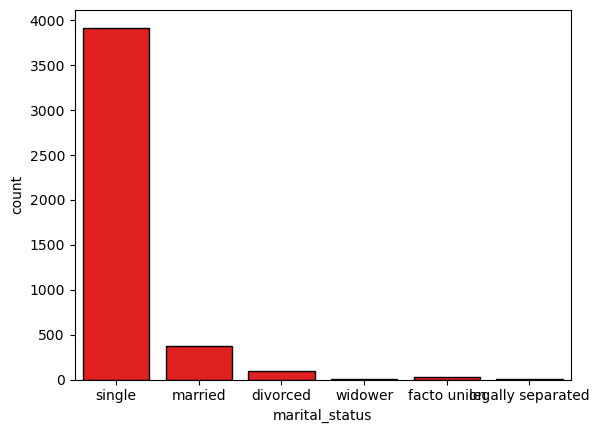

In [23]:
sns.countplot(data = df,x = 'marital_status',ec='k',color='red')

<Axes: xlabel='count', ylabel='nationality'>

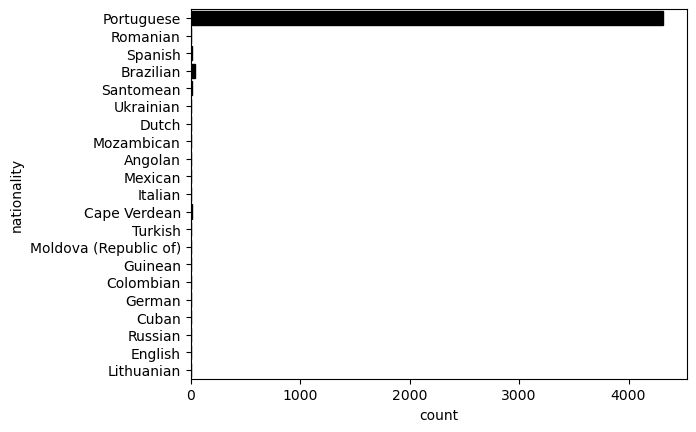

In [24]:
sns.countplot(data = df,y = 'nationality',ec='k',color='black')

<Axes: xlabel='attendance', ylabel='count'>

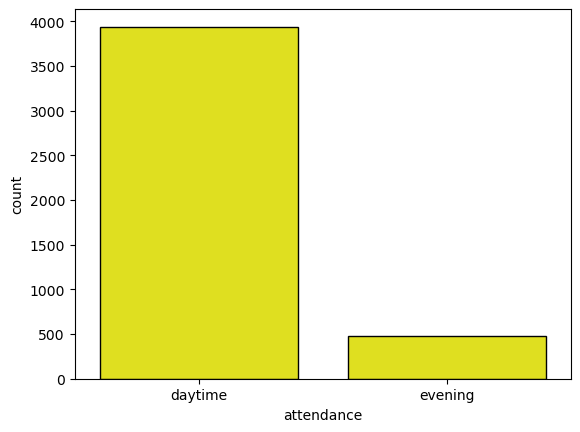

In [25]:
sns.countplot(data = df,x = 'attendance',ec='k',color='yellow')

<Axes: xlabel='count', ylabel='target'>

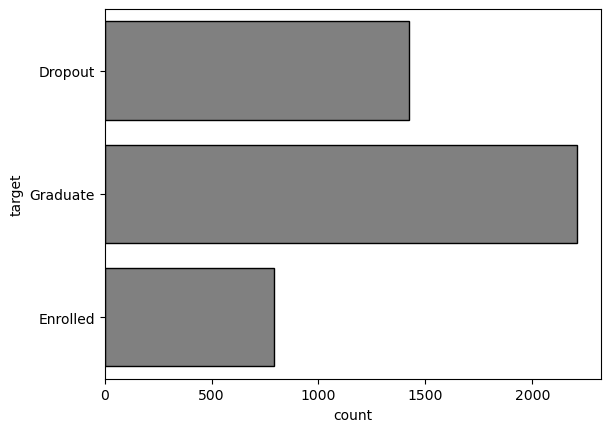

In [26]:
sns.countplot(data = df,y = 'target',ec='k',color='grey')

<Axes: xlabel='unemployment rate', ylabel='Count'>

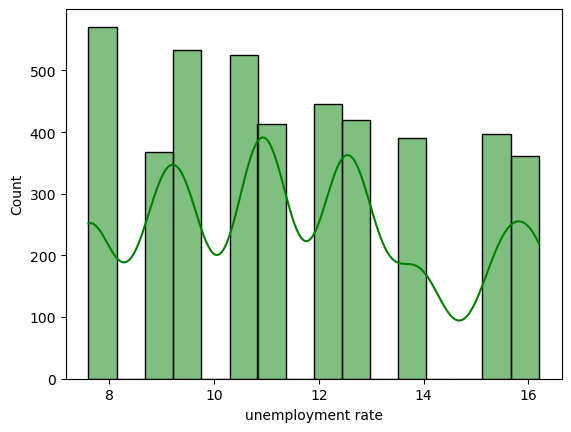

In [27]:
sns.histplot(data = df,x = 'unemployment rate',kde = True,color = 'green',ec  = 'k')

In [28]:
## BIVARIATE ANALYSIS

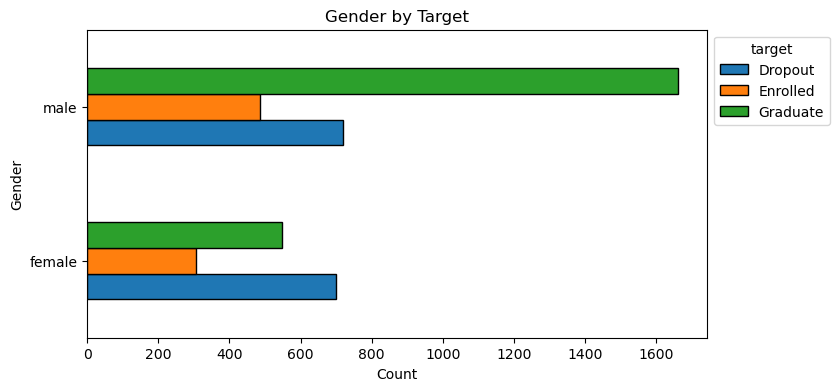

In [29]:
gender_target = pd.crosstab(df['gender'],df['target'])                                        ## categorical
gender_target.plot(kind = 'barh',ec  = 'k', figsize = (8, 4))
plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Gender by Target')
plt.legend(title = 'target', bbox_to_anchor = (1, 1))
plt.show()

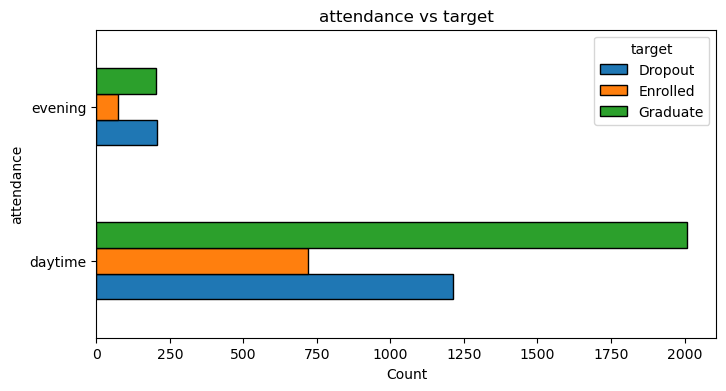

In [30]:
### Dropouts are same in both male and female but count of graduates are mare in male

attendance_target = pd.crosstab(df['attendance'],df['target'])
attendance_target.plot(kind='barh',ec='k', figsize=(8, 4))
plt.xlabel('Count')
plt.ylabel('attendance')
plt.title('attendance vs target')
plt.legend(title = 'target', bbox_to_anchor=(1, 1))
plt.show()

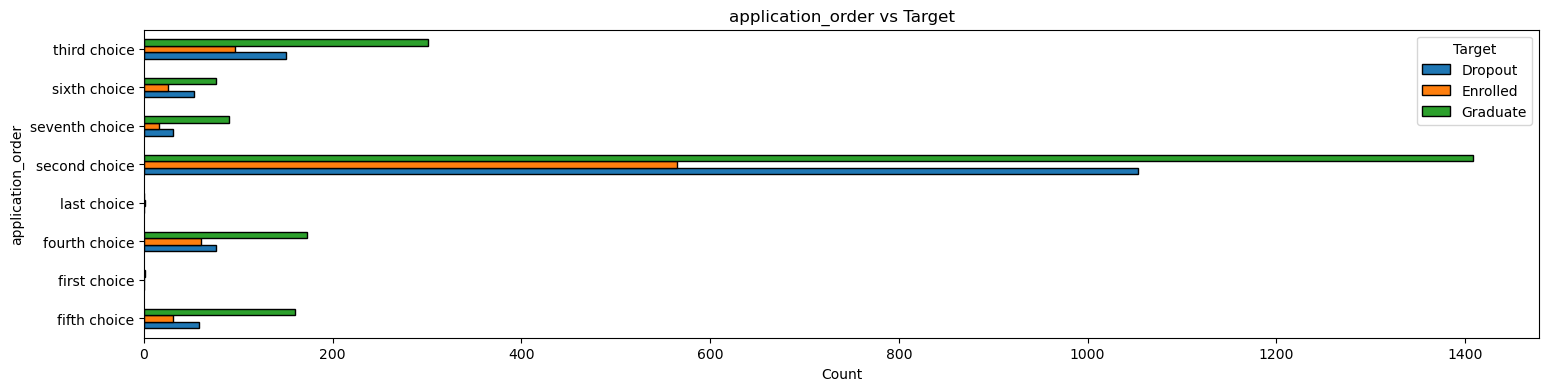

In [31]:
application_order_target = pd.crosstab(df['application_order'],df['target'])
application_order_target.plot(kind = 'barh',ec = 'k',figsize = (18, 4))
plt.xlabel('Count')
plt.ylabel('application_order')
plt.title('application_order vs Target')
plt.legend(title = 'Target', bbox_to_anchor = (1, 1))
plt.show()

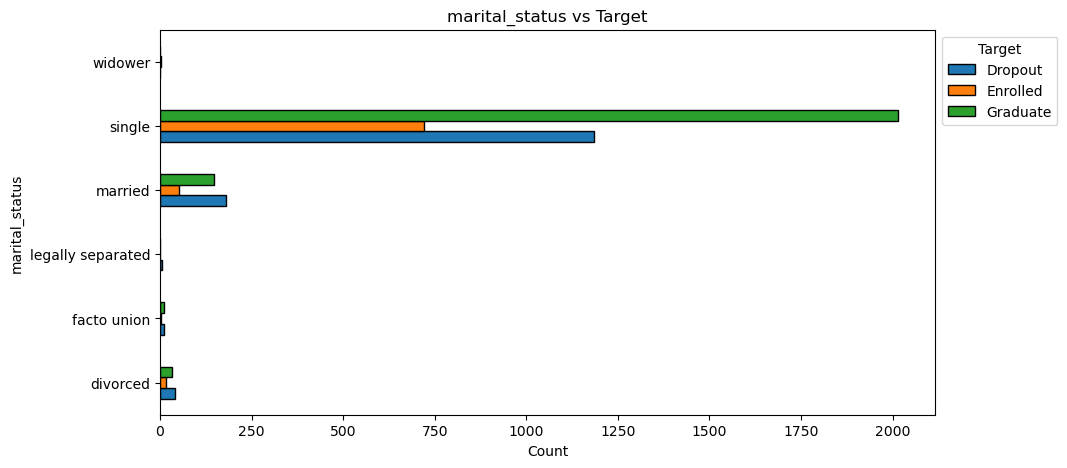

In [32]:
### More number of students dropouts from social service
marital_status_target = pd.crosstab(df['marital_status'],df['target'])
marital_status_target.plot(kind = 'barh',ec = 'k',figsize = (10, 5))
plt.xlabel('Count')
plt.ylabel('marital_status')
plt.title('marital_status vs Target')
plt.legend(title = 'Target',bbox_to_anchor = (1, 1))
plt.show()

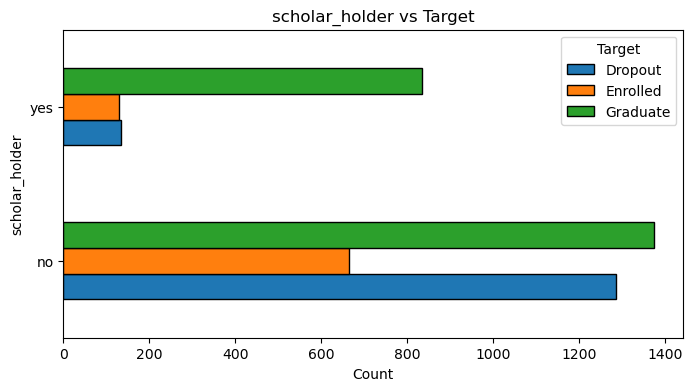

In [33]:
scholar_holder_target = pd.crosstab(df['scholar_holder'],df['target'])
scholar_holder_target.plot(kind = 'barh',ec = 'k',figsize = (8, 4))
plt.xlabel('Count')
plt.ylabel('scholar_holder')
plt.title('scholar_holder vs Target')
plt.legend(title = 'Target',bbox_to_anchor = (1, 1))
plt.show()

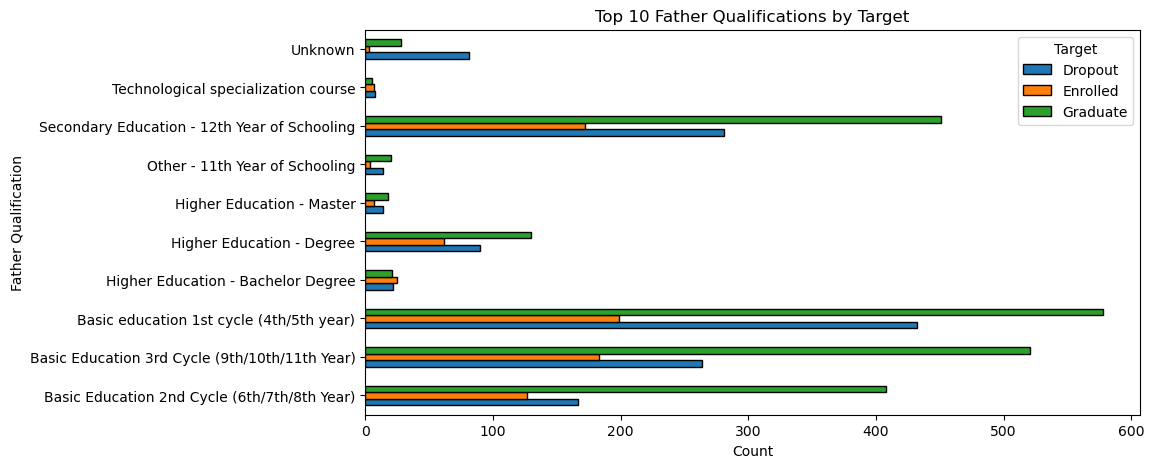

In [34]:
### The number of dropouts depends on mother's qualification
top_10_father_qualifications = df['father_qualific'].value_counts().nlargest(10).index
df_top_10 = df[df['father_qualific'].isin(top_10_father_qualifications)]
father_qualific_target = pd.crosstab(df_top_10['father_qualific'], df_top_10['target'])
father_qualific_target.plot(kind='barh', ec='k', figsize=(10, 5))
plt.xlabel('Count')
plt.ylabel('Father Qualification')
plt.title('Top 10 Father Qualifications by Target')
plt.legend(title='Target', bbox_to_anchor=(1, 1))
plt.show()

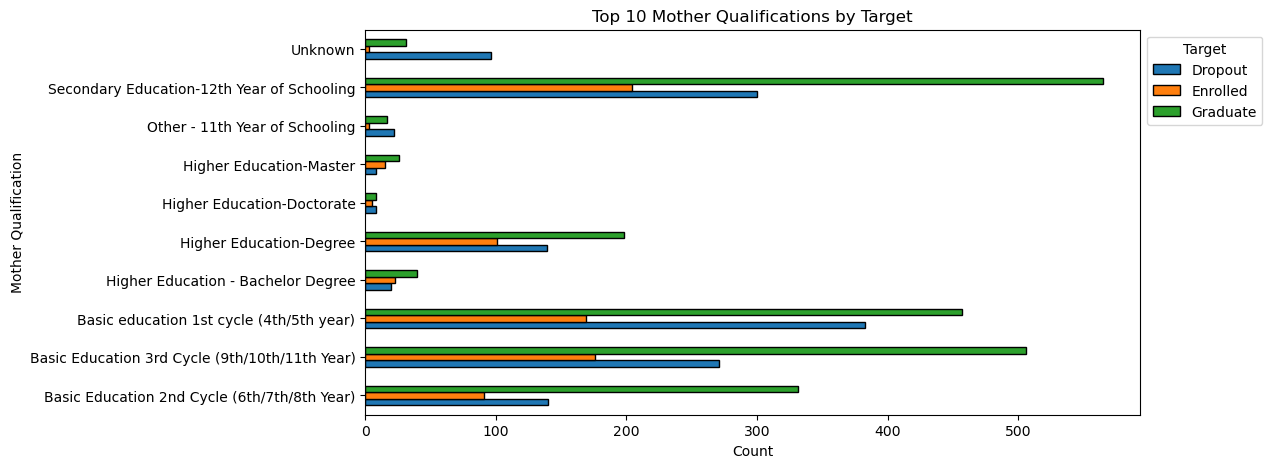

In [35]:
### The number of students who drop out is higher among those who do not receive a scholarship
top_10_mother_qualifications = df['mother_qualific'].value_counts().nlargest(10).index
df_top_10 = df[df['mother_qualific'].isin(top_10_mother_qualifications)]
gender_target = pd.crosstab(df_top_10['mother_qualific'], df_top_10['target'])
gender_target.plot(kind='barh', ec='k', figsize=(10, 5))
plt.xlabel('Count')
plt.ylabel('Mother Qualification')
plt.title('Top 10 Mother Qualifications by Target')
plt.legend(title='Target', bbox_to_anchor=(1, 1))
plt.show()

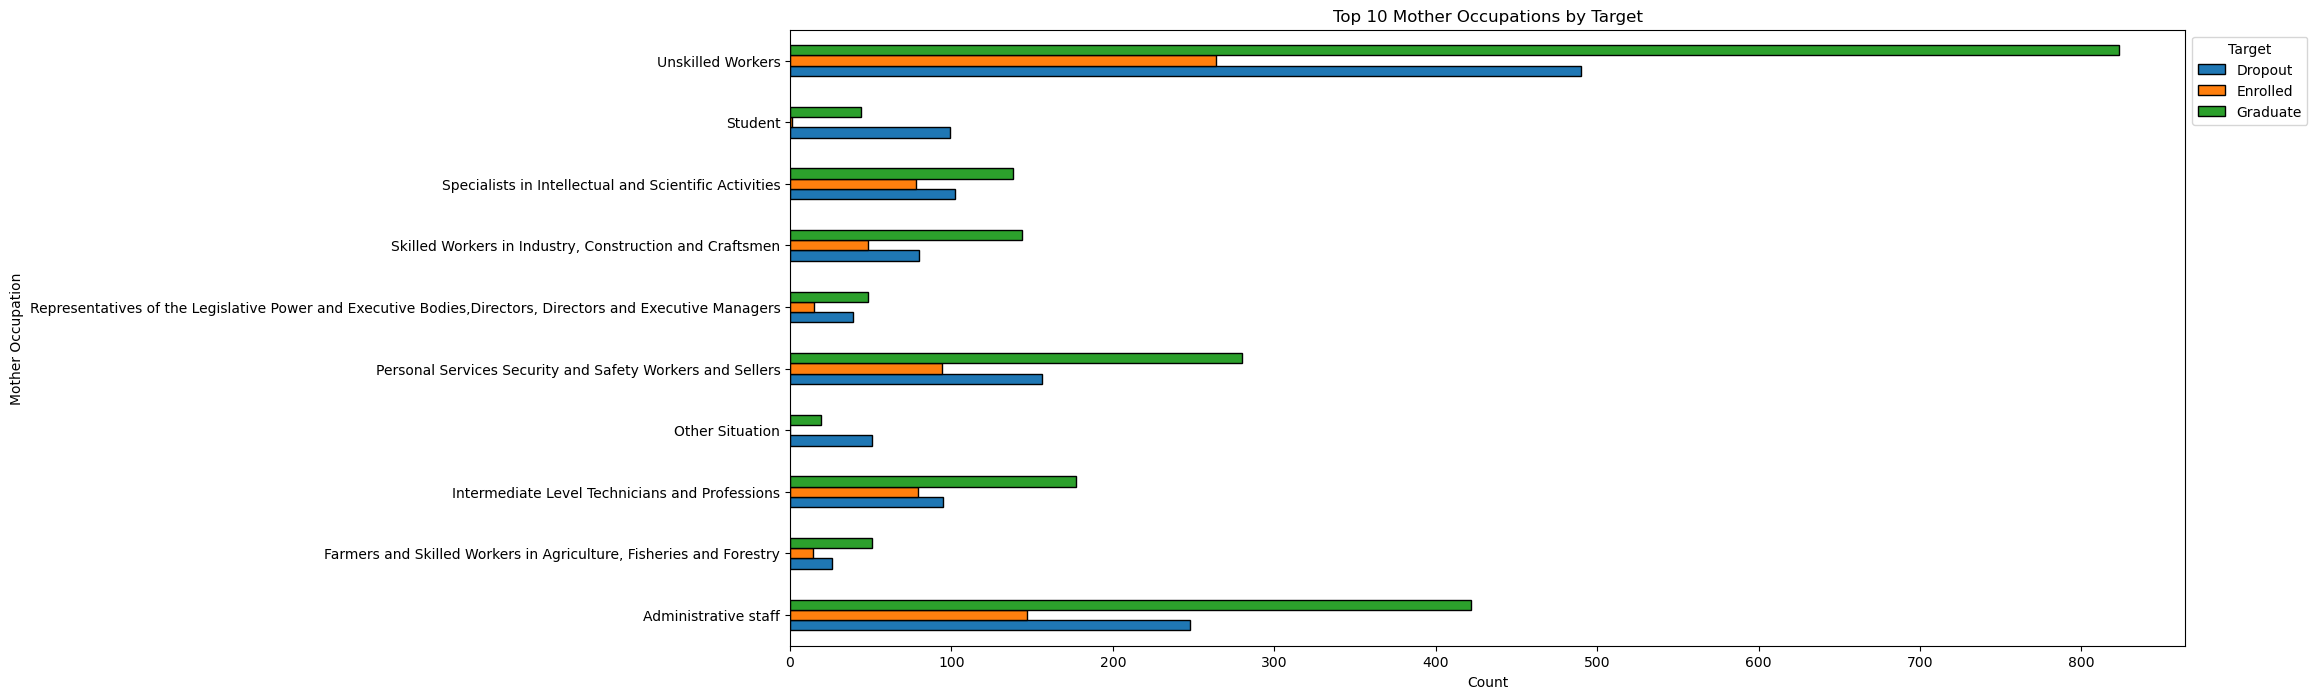

In [36]:
### The number of dropouts doesnot depends on father's qualification
top_10_mother_occupations = df['mother_occupation'].value_counts().nlargest(10).index
df_top_10 = df[df['mother_occupation'].isin(top_10_mother_occupations)]
mother_occupation_target = pd.crosstab(df_top_10['mother_occupation'], df_top_10['target'])
mother_occupation_target.plot(kind='barh', ec='k', figsize=(18, 8))
plt.xlabel('Count')
plt.ylabel('Mother Occupation')
plt.title('Top 10 Mother Occupations by Target')
plt.legend(title='Target', bbox_to_anchor=(1, 1))
plt.show()

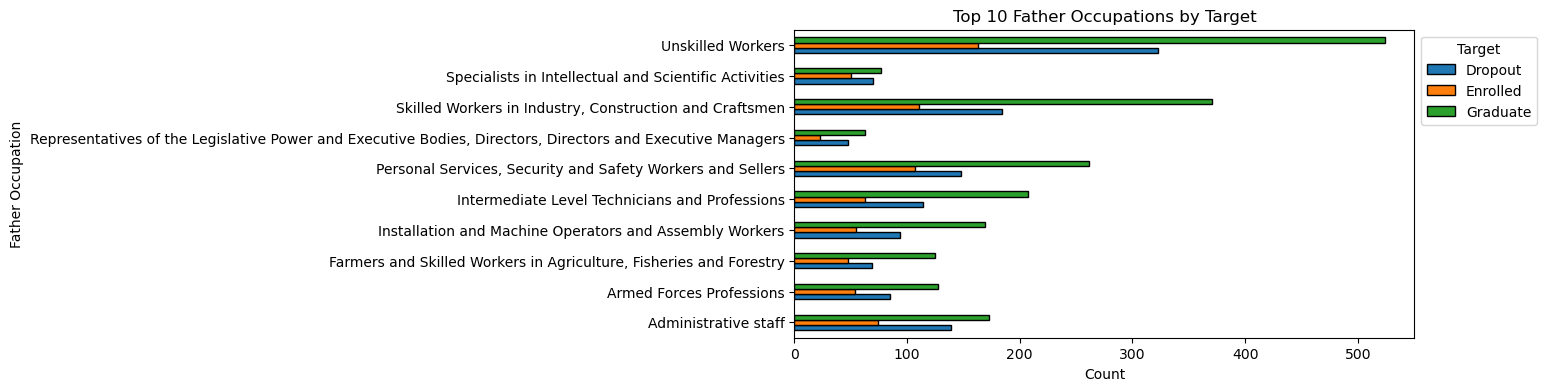

In [37]:
top_10_father_occupations = df['father_occupation'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 father occupations
df_top_10 = df[df['father_occupation'].isin(top_10_father_occupations)]

# Create the crosstab and plot
father_occupation_target = pd.crosstab(df_top_10['father_occupation'], df_top_10['target'])
father_occupation_target.plot(kind='barh', ec='k', figsize=(8, 4))
plt.xlabel('Count')
plt.ylabel('Father Occupation')
plt.title('Top 10 Father Occupations by Target')
plt.legend(title='Target', bbox_to_anchor=(1, 1))
plt.show()

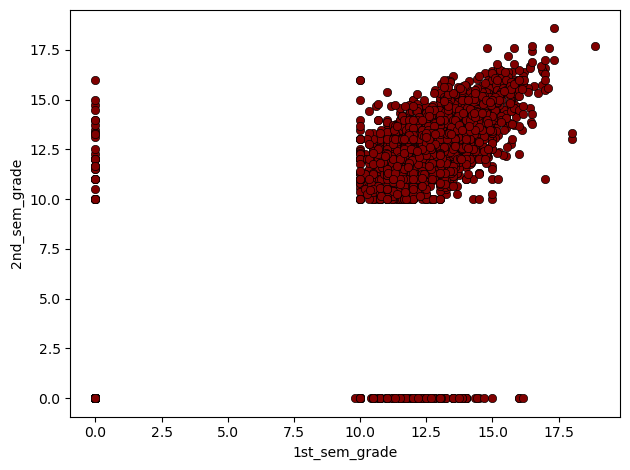

In [38]:
sns.scatterplot(data = df, x = '1st_sem_grade', y = '2nd_sem_grade', edgecolor = 'k', color = 'maroon')    ##Numerical vs numerical
plt.tight_layout()
plt.show()

<Axes: xlabel='1st_sem_grade', ylabel='1st_sem_evalua'>

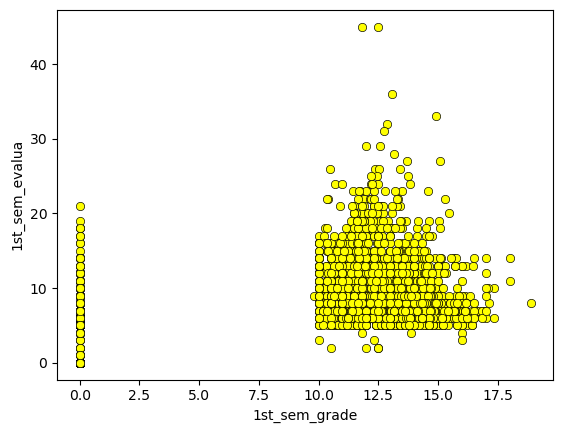

In [39]:
sns.scatterplot(data = df,x = '1st_sem_grade',y  = '1st_sem_evalua',ec = 'k',color = 'YELLOW')

<Axes: xlabel='1st_sem_grade', ylabel='unemployment rate'>

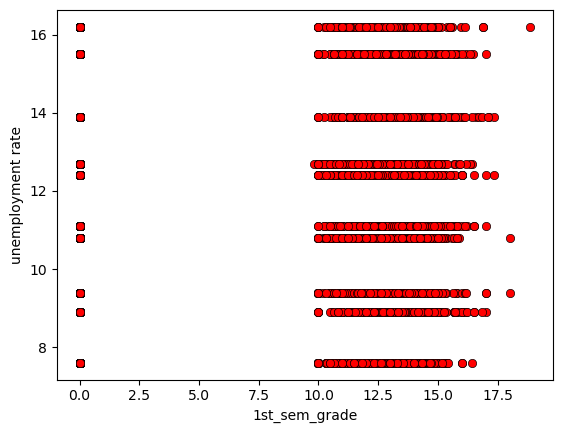

In [40]:
sns.scatterplot(data = df,x = '1st_sem_grade',y  = 'unemployment rate',ec = 'k',color = 'red')

Text(0.5, 1.0, 'target vs displaced')

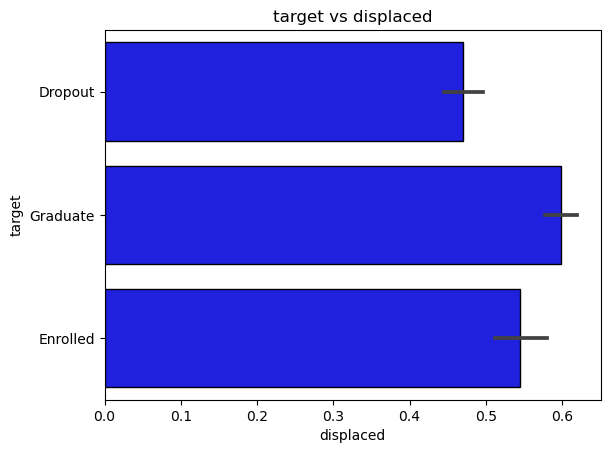

In [41]:
df1 = df.groupby('target')['displaced'].count()                                               ## numerical vs categorical 
sns.barplot(data = df,y = 'target',x = 'displaced',ec = 'k',color='blue')
plt.title('target vs displaced')

Text(0.5, 1.0, 'target vs age_at_enroll')

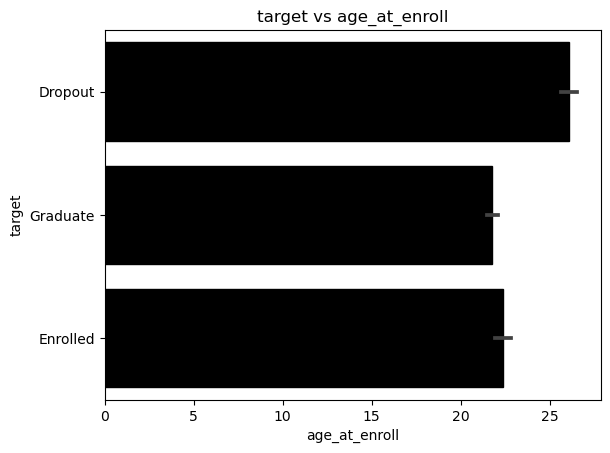

In [42]:
df1 = df.groupby('target')['age_at_enroll'].count()
sns.barplot(data = df,y = 'target',x = 'age_at_enroll',ec = 'k',color='black')
plt.title('target vs age_at_enroll')

Text(0.5, 1.0, 'target vs 2nd_sem_grade')

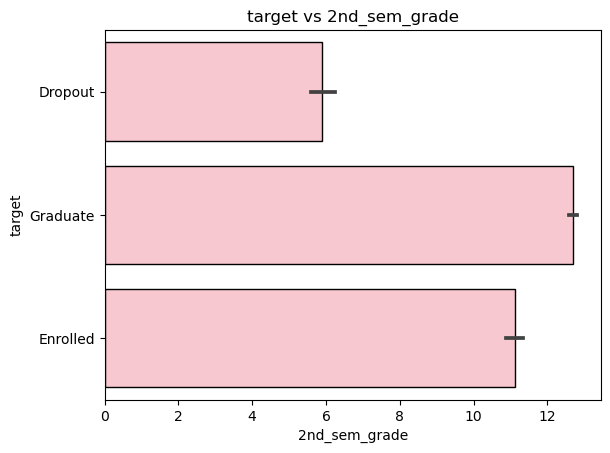

In [43]:
df1 = df.groupby('target')['2nd_sem_grade'].count()
sns.barplot(data = df,y = 'target',x = '2nd_sem_grade',ec = 'k',color='pink')
plt.title('target vs 2nd_sem_grade')

Text(0.5, 1.0, 'target vs 1st_sem_grade')

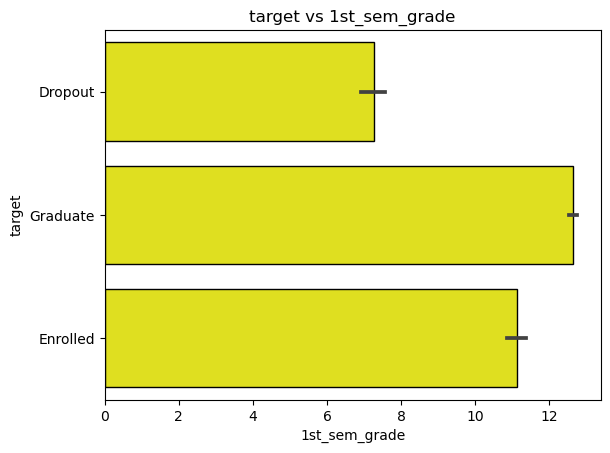

In [44]:
df1 = df.groupby('target')['1st_sem_grade'].count()
sns.barplot(data = df,y = 'target',x = '1st_sem_grade',ec = 'k',color='yellow')
plt.title('target vs 1st_sem_grade')

## MODEL BUILDING  

In [57]:
df =pd.read_csv(r"C:\rock\data.csv", delimiter=';')

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn import metrics

In [59]:
X = df.drop('Target',axis = 1)
y = df['Target']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [61]:
## k value

<Axes: xlabel='k', ylabel='Train_accuracy'>

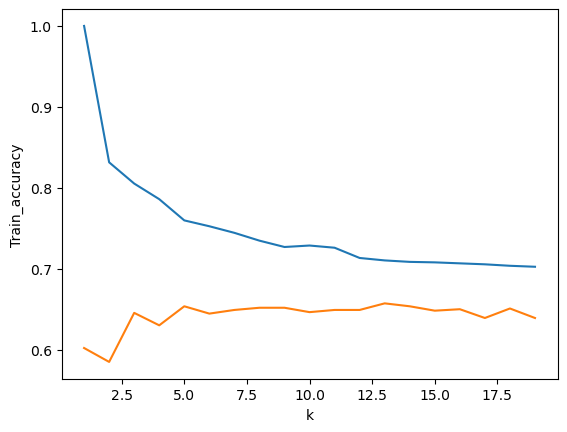

In [62]:
k_value = []
test_accuracy = []
train_accuracy = []

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i,p=1,metric='minkowski')
    knn.fit(X_train,y_train)


    y_pred  = knn.predict(X_test.values)
    y_pred_train = knn.predict(X_train.values)

    k_value.append(i)
    accuracy_test = accuracy_score(y_test,y_pred)
    accuracy_train =  accuracy_score(y_train,y_pred_train)

    test_accuracy.append(accuracy_test)
    train_accuracy.append(accuracy_train)

df2 = pd.DataFrame({'k':k_value,'Test_accuracy':test_accuracy,'Train_accuracy' : train_accuracy})
sns.lineplot(x = 'k',y = 'Train_accuracy',data = df2)
sns.lineplot(x = 'k',y = 'Test_accuracy',data = df2)

In [63]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [64]:
from sklearn.datasets import load_iris

In [55]:
k_value = []
val_accuracy = []
X,y=load_iris(return_X_y=True,as_frame=True)
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i,p=1,metric='minkowski')
    k_fold = KFold(n_splits = 5,shuffle = True,random_state = 15)
    cross_val_accuracy = cross_val_score(knn,X,y,cv = k_fold,scoring = 'accuracy')
    print(i,cross_val_accuracy.mean())
    k_value.append(i)
    val_accuracy.append(cross_val_accuracy.mean())

1 0.9400000000000001
2 0.9333333333333333
3 0.9466666666666667
4 0.9400000000000001
5 0.9400000000000001
6 0.9400000000000001
7 0.9400000000000001
8 0.9533333333333334
9 0.9600000000000002
10 0.9466666666666667
11 0.9533333333333334
12 0.9400000000000001
13 0.9533333333333334
14 0.9533333333333334
15 0.9733333333333334
16 0.9666666666666668
17 0.9733333333333334
18 0.9733333333333334
19 0.9733333333333334


In [65]:
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='k', ylabel='Train_accuracy'>

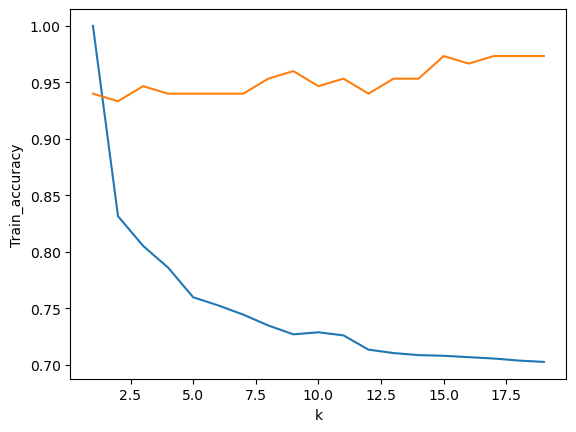

In [68]:
df3 = pd.DataFrame({'k':k_value,'Validation_accuracy':val_accuracy})
sns.lineplot(x = 'k',y = 'Train_accuracy',data = df2)
sns.lineplot(x = 'k',y = 'Validation_accuracy',data = df3)

In [69]:
df3

,k,Validation_accuracy
0,1,0.940000
1,2,0.933333
2,3,0.946667
3,4,0.940000
4,5,0.940000
5,6,0.940000
6,7,0.940000
7,8,0.953333
8,9,0.960000
9,10,0.946667


In [70]:
confusion = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1score = f1_score(y_test, y_pred,average='weighted')

print("Confusion Matrix:",confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1score:", f1score)

Confusion Matrix: [[196  25 153]
 [ 41  31 125]
 [ 32  23 480]]
Accuracy: 0.6392405063291139
Precision: 0.6226000482458502
Recall: 0.6392405063291139
f1score: 0.6053124966459313


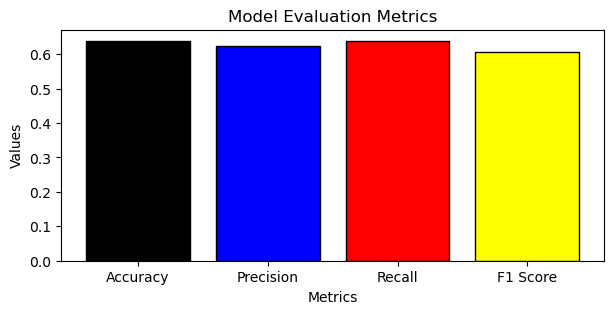

In [72]:
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [accuracy, precision, recall, f1score]

plt.figure(figsize=(7, 3))
plt.bar(metrics_names, metrics_values, color=['black', 'blue', 'red', 'yellow'],ec = 'k')
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

In [73]:
## ACCURACY SCORE

In [75]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Dropout       0.73      0.52      0.61       374
    Enrolled       0.39      0.16      0.22       197
    Graduate       0.63      0.90      0.74       535

    accuracy                           0.64      1106
   macro avg       0.58      0.53      0.53      1106
weighted avg       0.62      0.64      0.61      1106

